In [1]:
import pandas as pd
import numpy as np
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import ngrams
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
all = pd.read_csv('Customer Reviews Data.csv')

In [5]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/Owner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Owner/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
answers = " ".join(all['Statement'])
words = word_tokenize(answers)

In [8]:
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [9]:
lowered = clean_words(words)

In [10]:
bow = Counter(lowered)

In [11]:
data = pd.DataFrame(bow.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

In [12]:
data = data.head(20)

<AxesSubplot:xlabel='frequency', ylabel='word'>

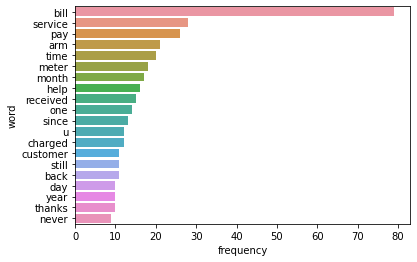

In [13]:
sns.barplot(x='frequency',y='word',data=data)

In [14]:
bow2 = Counter(ngrams(lowered,2))

In [15]:
def word_frequency(sentence):
    sentence =" ".join(sentence)
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams

In [16]:
data2,data3,data4 = word_frequency(all['Statement'])

<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

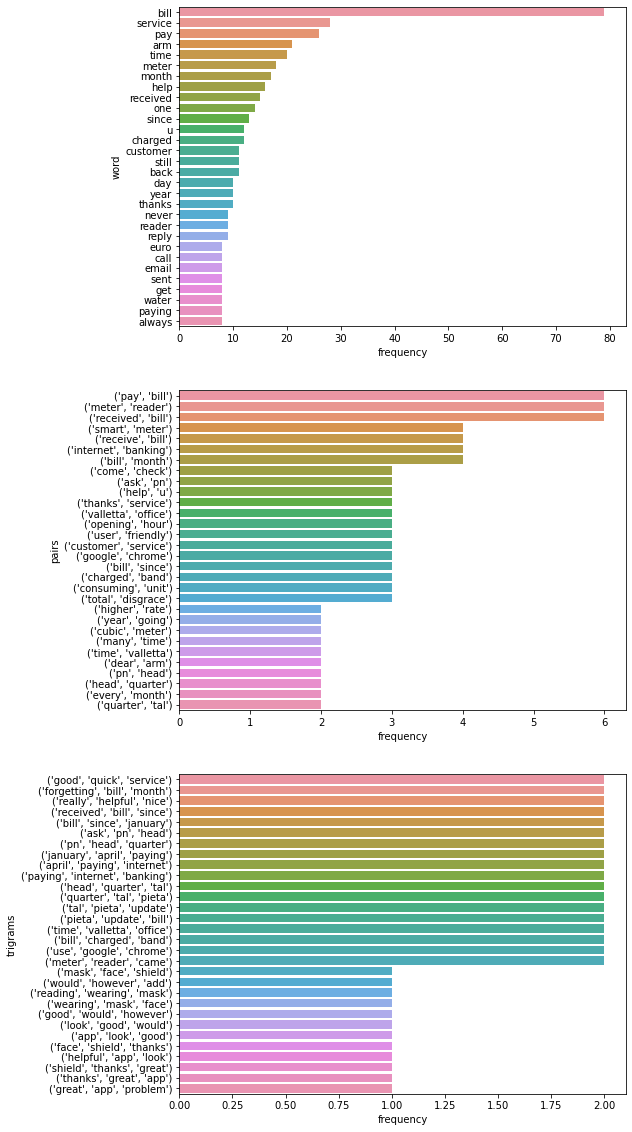

In [17]:
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))